Head of the DataFrame:
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

DataFrame with date as index:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


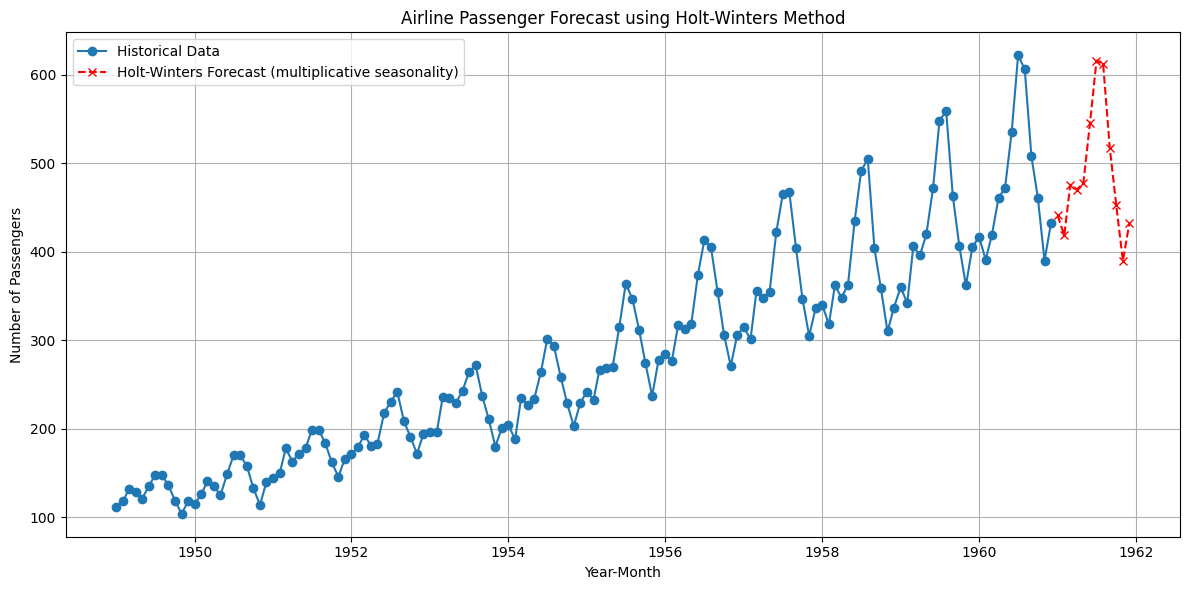


--- Forecasted Passenger Numbers ---
              Forecast
1961-01-01  441.110853
1961-02-01  418.648246
1961-03-01  475.841757
1961-04-01  470.310947
1961-05-01  477.879833
1961-06-01  546.038070
1961-07-01  615.996183
1961-08-01  611.926402
1961-09-01  517.156982
1961-10-01  452.619395
1961-11-01  389.675952
1961-12-01  432.280803


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/AirPassengers.csv'  # Update with your actual file path
date_column = 'Month'                # Column with dates in YYYY-MM format
value_column = '#Passengers'         # Column with passenger counts
date_format = '%Y-%m'                # Date format in your CSV
seasonal_period = 12                 # Yearly seasonality for monthly data
forecast_period = 12                 # Number of months to forecast (reduced for better visualization)
model_type = 'multiplicative'        # 'additive' or 'multiplicative'

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())

    # Convert the date column to datetime objects and set as index
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df.set_index(date_column, inplace=True)
    df = df[[value_column]]  # Keep only the passengers column
    df = df.dropna()
    df = df.sort_index()     # Ensure data is sorted by date

    print("\nDataFrame with date as index:")
    print(df.head())
    print("\nInfo of the DataFrame:")
    print(df.info())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file. Please check the column names.")
    exit()
except ValueError as e:
    print(f"Error: Could not parse date. Please check the 'date_format' variable. Details: {e}")
    exit()

# --- Apply Triple Exponential Smoothing (Holt-Winters) ---
if not df.empty:
    try:
        # Fit the Holt-Winters model
        model = ExponentialSmoothing(
            df[value_column],
            seasonal=model_type,
            seasonal_periods=seasonal_period,
            initialization_method="estimated"
        )
        fit = model.fit()

        # Generate the forecast
        forecast = fit.forecast(steps=forecast_period)

        # Create a DataFrame for the forecast index
        last_date = df.index[-1]
        forecast_index = pd.date_range(
            start=last_date + pd.DateOffset(months=1),
            periods=forecast_period,
            freq='MS'  # Month Start frequency
        )
        forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

        # --- Plot the actual data and the forecast ---
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df[value_column], label='Historical Data', marker='o')
        plt.plot(forecast_df.index, forecast_df['Forecast'], 
                label=f'Holt-Winters Forecast ({model_type} seasonality)', 
                color='red', linestyle='--', marker='x')
        plt.title('Airline Passenger Forecast using Holt-Winters Method')
        plt.xlabel('Year-Month')
        plt.ylabel('Number of Passengers')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Print forecast values
        print("\n--- Forecasted Passenger Numbers ---")
        print(forecast_df)

    except Exception as e:
        print(f"\nError in Holt-Winters forecasting: {e}")
        print("Possible solutions:")
        print("- Try 'additive' instead of 'multiplicative' seasonality")
        print("- Ensure you have enough data points (at least 2 full seasonal cycles)")
        print("- Check for missing values in your time series")

else:
    print("DataFrame is empty, cannot perform forecasting.")